<a href="https://colab.research.google.com/github/carloscelestino1/DataAnalytics/blob/main/DespesasParlamentar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pd = pd.read_csv('Ano-2022.csv',encoding = "ISO-8859-1" ,sep=';')

In [9]:
pd.head()

,"ï»¿""txNomeParlamentar""",cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÃA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÃÃO DA ATIVIDADE PARLAMENTAR.,...,2022,0,NaN,NaN,1833951,NaN,NaN,3453,7342370,https://www.camara.leg.br/cota-parlamentar/doc...
1,LIDERANÃA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÃÃES,...,2022,0,NaN,NaN,1822148,NaN,NaN,2713,7317427,https://www.camara.leg.br/cota-parlamentar/doc...
2,LIDERANÃA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÃÃES,...,2022,0,NaN,NaN,1825721,NaN,NaN,2713,7324813,https://www.camara.leg.br/cota-parlamentar/doc...
3,LIDERANÃA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÃÃES,...,2022,0,NaN,NaN,1824104,NaN,NaN,2713,7321395,https://www.camara.leg.br/cota-parlamentar/not...
4,LIDERANÃA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÃÃO DO PARLAMENTAR,...,2022,0,NaN,NaN,1826660,NaN,NaN,2713,7326637,https://www.camara.leg.br/cota-parlamentar/not...


In [12]:
pd.columns.to_list()

['ï»¿"txNomeParlamentar"',
 'cpf',
 'ideCadastro',
 'nuCarteiraParlamentar',
 'nuLegislatura',
 'sgUF',
 'sgPartido',
 'codLegislatura',
 'numSubCota',
 'txtDescricao',
 'numEspecificacaoSubCota',
 'txtDescricaoEspecificacao',
 'txtFornecedor',
 'txtCNPJCPF',
 'txtNumero',
 'indTipoDocumento',
 'datEmissao',
 'vlrDocumento',
 'vlrGlosa',
 'vlrLiquido',
 'numMes',
 'numAno',
 'numParcela',
 'txtPassageiro',
 'txtTrecho',
 'numLote',
 'numRessarcimento',
 'vlrRestituicao',
 'nuDeputadoId',
 'ideDocumento',
 'urlDocumento']

In [19]:
novoDf = pd[['ï»¿"txNomeParlamentar"','vlrLiquido']]
novoDf

,"ï»¿""txNomeParlamentar""",vlrLiquido
0,LIDERANÃA DO CIDADANIA,1561.96
1,LIDERANÃA DO DEMOCRATAS,600.00
2,LIDERANÃA DO DEMOCRATAS,600.00
3,LIDERANÃA DO DEMOCRATAS,1527.28
4,LIDERANÃA DO DEMOCRATAS,2500.00
...,...,...
135935,Eliza VirgÃ­nia,300.00
135936,Eliza VirgÃ­nia,4000.00
135937,Eliza VirgÃ­nia,7000.00
135938,Eliza VirgÃ­nia,1814.33


In [20]:
novoDf.isnull().sum()

ï»¿"txNomeParlamentar"    0
vlrLiquido                0
dtype: int64

In [21]:
novoDf.describe

<bound method NDFrame.describe of           ï»¿"txNomeParlamentar"  vlrLiquido
0        LIDERANÃA DO CIDADANIA     1561.96
1       LIDERANÃA DO DEMOCRATAS      600.00
2       LIDERANÃA DO DEMOCRATAS      600.00
3       LIDERANÃA DO DEMOCRATAS     1527.28
4       LIDERANÃA DO DEMOCRATAS     2500.00
...                          ...         ...
135935           Eliza VirgÃ­nia      300.00
135936           Eliza VirgÃ­nia     4000.00
135937           Eliza VirgÃ­nia     7000.00
135938           Eliza VirgÃ­nia     1814.33
135939           Eliza VirgÃ­nia     1820.45

[135940 rows x 2 columns]>

In [55]:
novo_df = novoDf.groupby(['ï»¿"txNomeParlamentar"'])['vlrLiquido'].sum().reset_index()

In [56]:
novo_df

,"ï»¿""txNomeParlamentar""",vlrLiquido
0,AJ Albuquerque,244640.83
1,Abou Anni,266156.83
2,AbÃ­lio Santana,244584.73
3,AcÃ¡cio Favacho,291858.08
4,Adolfo Viana,295866.38
...,...,...
564,ZÃ© Silva,251136.11
565,ZÃ© Vitor,188774.08
566,Ãtila Lins,333735.14
567,Ãtila Lira,282733.17


In [62]:
novo = novo_df.rename(columns={'ï»¿"txNomeParlamentar"':'NomeParlamentar'})

In [65]:
padrao1 = novo.sort_values(by=['vlrLiquido'])

In [120]:
graf1 = padrao1.head()
graf1 = graf1.reset_index()
del graf1['index']
graf1 = graf1.reindex()
graf1

,NomeParlamentar,vlrLiquido
0,Flordelis,-771.00
1,Marcio Alvino,80.56
2,LIDERANÃA DO CIDADANIA,1561.96
3,LIDERANÃA DO PSL,1600.00
4,AnÃ­bal Gomes,2700.08


In [121]:
graf2 = padrao1.tail()
graf2 = graf2.reset_index()
del graf2['index']
graf2 = graf2.reindex()
graf2

,NomeParlamentar,vlrLiquido
0,Aline Gurgel,337636.49
1,Jesus SÃ©rgio,338528.97
2,Danilo Forte,343234.10
3,Joenia Wapichana,347008.70
4,Bibo Nunes,371273.46


In [ ]:
total_verba = graf1.vlrLiquido.sum()+graf2.vlrLiquido.sum()

percentage1 = []
for i in range(graf1.shape[0]):
    pct = (graf1.vlrLiquido[i] / total_verba) * 100
    percentage1.append(round(pct, 2))

percentage2 = []
for i in range(graf2.shape[0]):
    pct = (graf2.vlrLiquido[i] / total_verba) * 100
    percentage2.append(round(pct, 2))

graf1['Percentage'] = percentage1
display(graf1)
graf2['Percentage'] = percentage2
display(graf2)



In [82]:
plt.rcParams['figure.figsize'] = [30,12]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Unrecognized location 'low right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


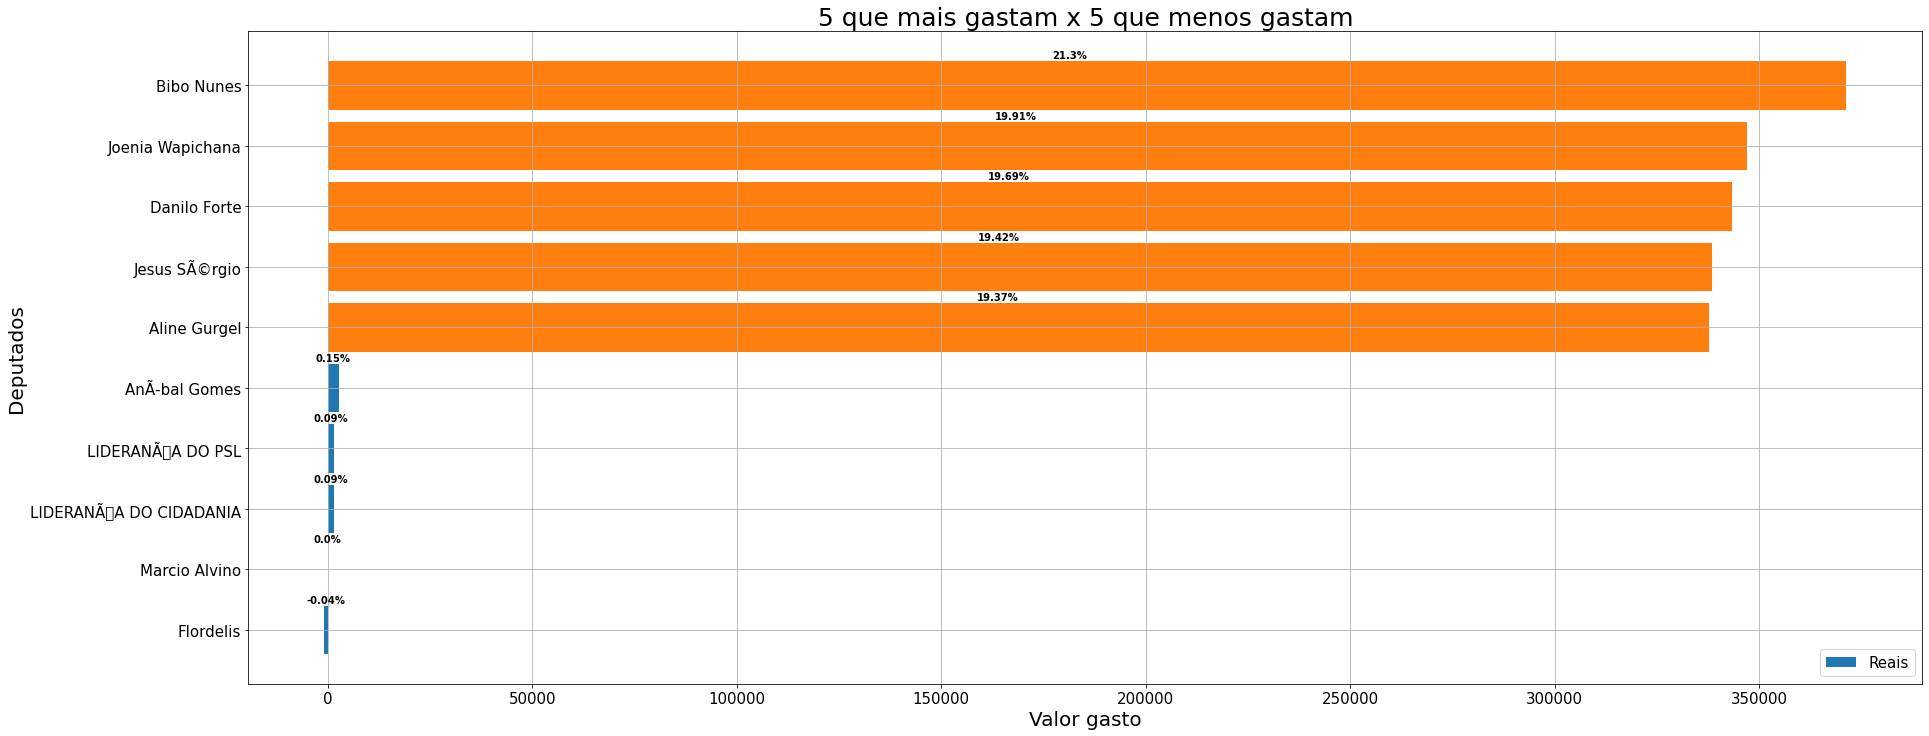

In [155]:

graph1 = plt.barh(graf1.NomeParlamentar, graf1.vlrLiquido)

i = 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(graf1.Percentage[i])+'%',
             ha='center',
             va='bottom',
             weight='bold')
    i += 1

graph2 = plt.barh(graf2.NomeParlamentar, graf2.vlrLiquido)

i = 0
for p in graph2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(graf2.Percentage[i])+'%',
             ha='right',
             va='bottom',
             weight='bold')
    i += 1

plt.xlabel('Valor gasto', fontsize=20)
plt.ylabel('Deputados', fontsize=20)
plt.legend(['Reais'], loc='low right', fontsize=15)
plt.title("5 que mais gastam x 5 que menos gastam", fontsize=25)
plt.tick_params(labelsize=15)
plt.grid(True)
plt.show()


In [197]:
novoDf2 = pd[['ï»¿"txNomeParlamentar"','txtDescricao','vlrLiquido']]
novoDf2

,"ï»¿""txNomeParlamentar""",txtDescricao,vlrLiquido
0,LIDERANÃA DO CIDADANIA,DIVULGAÃÃO DA ATIVIDADE PARLAMENTAR.,1561.96
1,LIDERANÃA DO DEMOCRATAS,ASSINATURA DE PUBLICAÃÃES,600.00
2,LIDERANÃA DO DEMOCRATAS,ASSINATURA DE PUBLICAÃÃES,600.00
3,LIDERANÃA DO DEMOCRATAS,ASSINATURA DE PUBLICAÃÃES,1527.28
4,LIDERANÃA DO DEMOCRATAS,FORNECIMENTO DE ALIMENTAÃÃO DO PARLAMENTAR,2500.00
...,...,...,...
135935,Eliza VirgÃ­nia,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",300.00
135936,Eliza VirgÃ­nia,LOCAÃÃO OU FRETAMENTO DE VEÃCULOS AUTOMOTORES,4000.00
135937,Eliza VirgÃ­nia,LOCAÃÃO OU FRETAMENTO DE VEÃCULOS AUTOMOTORES,7000.00
135938,Eliza VirgÃ­nia,PASSAGEM AÃREA - SIGEPA,1814.33


In [198]:
novo2 = novoDf2.rename(columns={'ï»¿"txNomeParlamentar"':'NomeParlamentar'})
novo2

,NomeParlamentar,txtDescricao,vlrLiquido
0,LIDERANÃA DO CIDADANIA,DIVULGAÃÃO DA ATIVIDADE PARLAMENTAR.,1561.96
1,LIDERANÃA DO DEMOCRATAS,ASSINATURA DE PUBLICAÃÃES,600.00
2,LIDERANÃA DO DEMOCRATAS,ASSINATURA DE PUBLICAÃÃES,600.00
3,LIDERANÃA DO DEMOCRATAS,ASSINATURA DE PUBLICAÃÃES,1527.28
4,LIDERANÃA DO DEMOCRATAS,FORNECIMENTO DE ALIMENTAÃÃO DO PARLAMENTAR,2500.00
...,...,...,...
135935,Eliza VirgÃ­nia,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",300.00
135936,Eliza VirgÃ­nia,LOCAÃÃO OU FRETAMENTO DE VEÃCULOS AUTOMOTORES,4000.00
135937,Eliza VirgÃ­nia,LOCAÃÃO OU FRETAMENTO DE VEÃCULOS AUTOMOTORES,7000.00
135938,Eliza VirgÃ­nia,PASSAGEM AÃREA - SIGEPA,1814.33


In [201]:
values = ['Bibo Nunes']
deput = novo2[novo2.NomeParlamentar.isin(values)]
deput




,NomeParlamentar,txtDescricao,vlrLiquido
88542,Bibo Nunes,MANUTENÃÃO DE ESCRITÃRIO DE APOIO Ã ATIVID...,518.50
88543,Bibo Nunes,MANUTENÃÃO DE ESCRITÃRIO DE APOIO Ã ATIVID...,518.50
88544,Bibo Nunes,MANUTENÃÃO DE ESCRITÃRIO DE APOIO Ã ATIVID...,518.50
88545,Bibo Nunes,MANUTENÃÃO DE ESCRITÃRIO DE APOIO Ã ATIVID...,518.50
88546,Bibo Nunes,MANUTENÃÃO DE ESCRITÃRIO DE APOIO Ã ATIVID...,518.50
...,...,...,...
88996,Bibo Nunes,PASSAGEM AÃREA - SIGEPA,1379.05
88997,Bibo Nunes,PASSAGEM AÃREA - SIGEPA,1379.05
88998,Bibo Nunes,PASSAGEM AÃREA - SIGEPA,1379.05
88999,Bibo Nunes,PASSAGEM AÃREA - RPA,114.00


In [208]:
deput.value_counts()

NomeParlamentar  txtDescricao                                            vlrLiquido
Bibo Nunes       COMBUSTÃVEIS E LUBRIFICANTES.                          200.00        13
                 PASSAGEM AÃREA - SIGEPA                                1379.05       10
                                                                         1372.33        9
                 SERVIÃOS POSTAIS                                       51.91          8
                 HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.  195.00         7
                                                                                       ..
                 FORNECIMENTO DE ALIMENTAÃÃO DO PARLAMENTAR            15.23          1
                                                                         15.00          1
                                                                         7.30           1
                 DIVULGAÃÃO DA ATIVIDADE PARLAMENTAR.                  75795.00       1
                

In [210]:
deput.sort_values(by=['vlrLiquido'])


,NomeParlamentar,txtDescricao,vlrLiquido
88992,Bibo Nunes,PASSAGEM AÃREA - SIGEPA,-1372.33
89000,Bibo Nunes,PASSAGEM AÃREA - RPA,-41.05
88736,Bibo Nunes,TELEFONIA,4.21
88660,Bibo Nunes,COMBUSTÃVEIS E LUBRIFICANTES.,4.29
88743,Bibo Nunes,TELEFONIA,4.53
...,...,...,...
88925,Bibo Nunes,LOCAÃÃO OU FRETAMENTO DE VEÃCULOS AUTOMOTORES,4404.00
88924,Bibo Nunes,LOCAÃÃO OU FRETAMENTO DE VEÃCULOS AUTOMOTORES,4404.00
88709,Bibo Nunes,DIVULGAÃÃO DA ATIVIDADE PARLAMENTAR.,5500.00
88727,Bibo Nunes,DIVULGAÃÃO DA ATIVIDADE PARLAMENTAR.,75000.00
